In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde
import pandas as pd
import matplotlib
import xarray as xr
import cmaps

In [2]:
df = pd.read_csv('C:/Users/br_bo/Desktop/PINN_example2/whole2023-12-20/data/predictions.csv')

# 选择第一个维度的数据，这里假设是 CSV 文件的第一列
# u
data1 = df.iloc[:, 0].values  # iloc[:, 0] 选择所有行的第一列，.values 转换为 numpy 数组
print(data1.shape)
reshaped_data1 = data1.reshape((3, 201, 201))
# v
data2 = df.iloc[:, 1].values  # iloc[:, 0] 选择所有行的第一列，.values 转换为 numpy 数组
reshaped_data2 = data2.reshape((3, 201, 201))

(121203,)


In [3]:
selected_u = reshaped_data1[:, 0:200, 0:200]
selected_v = reshaped_data2[:, 0:200, 0:200]

In [4]:
print(selected_u.shape)

(3, 200, 200)


In [5]:
ds = xr.open_dataset(r'E:/PINN/PINN-usual-z-change-eqn-buoy-example2/data/CCMP_Wind_Analysis_20231220_V03.1_L4.nc')
print(ds)

<xarray.Dataset>
Dimensions:    (time: 4, latitude: 720, longitude: 1440)
Coordinates:
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * time       (time) datetime64[ns] 2023-12-20 ... 2023-12-20T18:00:00
Data variables:
    uwnd       (time, latitude, longitude) float32 ...
    vwnd       (time, latitude, longitude) float32 ...
    ws         (time, latitude, longitude) float32 ...
    nobs       (time, latitude, longitude) float32 ...
Attributes: (12/54)
    contact:                       Remote Sensing Systems, support@remss.com
    Conventions:                   CF-1.7 ACDD-1.3
    data_structure:                grid
    title:                         RSS CCMP V3.1 6-hourly surface winds (Leve...
    summary:                       RSS VAM 6-hour analyses using ERA-5 wind r...
    institute_id:                  RSS
    ...                            ...
    time_coverage_e

In [6]:
# 提取第三个时间点的数据
time_index = 2  # 第三个时间点的索引
uwnd = ds['uwnd'][time_index]
vwnd = ds['vwnd'][time_index]
ws = ds['ws'][time_index]

# 选择特定的经纬度范围
lon_range = (150, 200)
lat_range = (-23, 27)

# 选择在经纬度范围内的数据
mask_lon = (ds['longitude'] >= lon_range[0]) & (ds['longitude'] <= lon_range[1])
mask_lat = (ds['latitude'] >= lat_range[0]) & (ds['latitude'] <= lat_range[1])

uwnd = uwnd.sel(longitude=ds['longitude'][mask_lon], latitude=ds['latitude'][mask_lat])
vwnd = vwnd.sel(longitude=ds['longitude'][mask_lon], latitude=ds['latitude'][mask_lat])
ws = ws.sel(longitude=ds['longitude'][mask_lon], latitude=ds['latitude'][mask_lat])

selected_u3 = uwnd[ :, :]
selected_v3 = vwnd[ :, :]
wind_speed3 = np.sqrt(selected_v3**2 + selected_u3**2)

In [7]:
# 将二维数组扩展为三维数组，复制三次
selected_u3_3d = np.tile(selected_u3, (3, 1, 1))
selected_v3_3d = np.tile(selected_v3, (3, 1, 1))

In [8]:
dataa = xr.open_dataset(r'E:/PINN/PINN-usual-z-change-eqn-example2/data/cmems_obs-wind_glo_phy_nrt_l3-hy2d-hscat-des-0.25deg_P1D-i_1737010693738.nc', decode_times=False)
print(dataa)

<xarray.Dataset>
Dimensions:           (time: 1, latitude: 200, longitude: 200)
Coordinates:
  * time              (time) float64 1.703e+09
  * latitude          (latitude) float32 -3.875 -3.625 -3.375 ... 45.62 45.88
  * longitude         (longitude) float32 -179.9 -179.6 -179.4 ... -130.4 -130.1
Data variables:
    eastward_wind     (time, latitude, longitude) float32 ...
    measurement_time  (time, latitude, longitude) float32 ...
    northward_wind    (time, latitude, longitude) float32 ...
    wind_speed        (time, latitude, longitude) float32 ...
    wind_to_dir       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:       CF-1.11
    title:             Global Ocean - Wind - HY-2D HSCAT - 25km daily Descend...
    institution:       EUMETSAT/OSI SAF/KNMI
    source:            HY-2D HSCAT
    history:           N/A
    references:        HY-2 Wind Product User Manual, https://osi-saf.eumetsa...
    comment:           Orbit period and inclination are constan

In [9]:
datab = xr.open_dataset(r'E:/PINN/PINN-usual-z-change-eqn-example2/data/cmems_obs-wind_glo_phy_nrt_l3-metopc-ascat-des-0.25deg_P1D-i_1736749709616.nc', decode_times=False)
print(datab)

<xarray.Dataset>
Dimensions:           (time: 1, latitude: 200, longitude: 200)
Coordinates:
  * time              (time) float64 1.703e+09
  * latitude          (latitude) float32 -3.875 -3.625 -3.375 ... 45.62 45.88
  * longitude         (longitude) float32 -179.9 -179.6 -179.4 ... -130.4 -130.1
Data variables:
    eastward_wind     (time, latitude, longitude) float32 ...
    measurement_time  (time, latitude, longitude) float32 ...
    northward_wind    (time, latitude, longitude) float32 ...
    wind_speed        (time, latitude, longitude) float32 ...
    wind_to_dir       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:       CF-1.11
    title:             Global Ocean - Wind - METOP-C ASCAT - 25km daily Desce...
    institution:       EUMETSAT/OSI SAF/KNMI
    source:            MetOp-C ASCAT
    history:           N/A
    references:        ASCAT Wind Product User Manual, https://osi-saf.eumets...
    comment:           Orbit period and inclination are const

In [10]:
datac = xr.open_dataset(r'E:/PINN/PINN-usual-z-change-eqn-example2/data/cmems_obs-wind_glo_phy_nrt_l3-metopb-ascat-des-0.25deg_P1D-i_1736749748590.nc', decode_times=False)
print(datac)

<xarray.Dataset>
Dimensions:           (time: 1, latitude: 200, longitude: 200)
Coordinates:
  * time              (time) float64 1.703e+09
  * latitude          (latitude) float32 -3.875 -3.625 -3.375 ... 45.62 45.88
  * longitude         (longitude) float32 -179.9 -179.6 -179.4 ... -130.4 -130.1
Data variables:
    eastward_wind     (time, latitude, longitude) float32 ...
    northward_wind    (time, latitude, longitude) float32 ...
    measurement_time  (time, latitude, longitude) float32 ...
    wind_speed        (time, latitude, longitude) float32 ...
    wind_to_dir       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:       CF-1.11
    title:             Global Ocean - Wind - METOP-B ASCAT - 25km daily Desce...
    institution:       EUMETSAT/OSI SAF/KNMI
    source:            MetOp-B ASCAT
    history:           N/A
    references:        ASCAT Wind Product User Manual, https://osi-saf.eumets...
    comment:           Orbit period and inclination are const

In [11]:
U_stara = dataa['eastward_wind'] # T*L*X*Y N x T
V_stara = dataa['northward_wind']

In [12]:
U_starb = datab['eastward_wind'] # T*L*X*Y N x T
V_starb = datab['northward_wind']

In [13]:
U_starc = datac['eastward_wind'] # T*L*X*Y N x T
V_starc = datac['northward_wind']

In [14]:
dataa1 = U_stara.values  # iloc[:, 0] 选择所有行的第一列，.values 转换为 numpy 数组
reshaped_dataa1 = dataa1.reshape((200, 200))
# v
dataa2 = V_stara.values  # iloc[:, 0] 选择所有行的第一列，.values 转换为 numpy 数组
reshaped_dataa2 = dataa2.reshape((200, 200))

In [15]:
datab1 = U_starb.values  # iloc[:, 0] 选择所有行的第一列，.values 转换为 numpy 数组
reshaped_datab1 = datab1.reshape((200, 200))
# v
datab2 = V_starb.values  # iloc[:, 0] 选择所有行的第一列，.values 转换为 numpy 数组
reshaped_datab2 = datab2.reshape((200, 200))

In [16]:
datac1 = U_starc.values  # iloc[:, 0] 选择所有行的第一列，.values 转换为 numpy 数组
reshaped_datac1 = datac1.reshape((200, 200))
# v
datac2 = V_starc.values  # iloc[:, 0] 选择所有行的第一列，.values 转换为 numpy 数组
reshaped_datac2 = datac2.reshape((200, 200))

In [17]:
# 合并 reshaped_dataa1, reshaped_datab1, reshaped_datac1 成一个三维数组
combined_data1 = np.stack((reshaped_dataa1, reshaped_datab1, reshaped_datac1))

In [18]:
# 合并 reshaped_dataa1, reshaped_datab1, reshaped_datac1 成一个三维数组
combined_data2 = np.stack((reshaped_dataa2, reshaped_datab2, reshaped_datac2))

In [19]:
nan_mask1 = np.isnan(combined_data1)

# 提取每个二维数组中的非 NaN 值，并展平为一维数组
non_nan_values_a1 = combined_data1[0][~nan_mask1[0]]
non_nan_values_b1 = combined_data1[1][~nan_mask1[1]]
non_nan_values_c1 = combined_data1[2][~nan_mask1[2]]

# 将它们组合成一个形状为 (3, :) 的对象数组
non_nan_values_combined_data1 = np.array([non_nan_values_a1, non_nan_values_b1, non_nan_values_c1], dtype=object)

print(non_nan_values_combined_data1)
print(non_nan_values_combined_data1.shape)  # 这将输出 (3,)

[array([-2.04, -2.11, -2.32, ...,  4.28,  3.99,  3.59], dtype=float32)
 array([ 1.11,  0.51, -0.71, ...,  3.6 ,  3.19,  2.89], dtype=float32)
 array([-1.11, -1.26, -0.76, ...,  6.7 ,  6.59,  6.54], dtype=float32)]
(3,)


In [20]:
nan_mask2 = np.isnan(combined_data2)

# 提取每个二维数组中的非 NaN 值，并展平为一维数组
non_nan_values_a2 = combined_data2[0][~nan_mask1[0]]
non_nan_values_b2 = combined_data2[1][~nan_mask1[1]]
non_nan_values_c2 = combined_data2[2][~nan_mask1[2]]

# 将它们组合成一个形状为 (3, :) 的对象数组
non_nan_values_combined_data2 = np.array([non_nan_values_a2, non_nan_values_b2, non_nan_values_c2], dtype=object)

print(non_nan_values_combined_data2)
print(non_nan_values_combined_data2.shape)  # 这将输出 (3,)

[array([-2.68, -2.68, -2.57, ..., -4.72, -4.54, -4.48], dtype=float32)
 array([-3.61, -3.39, -3.  , ...,  0.07, -0.16, -0.45], dtype=float32)
 array([-2.43, -1.37, -1.15, ...,  3.79,  3.95,  3.96], dtype=float32)]
(3,)


In [17]:
non_nan_values_ua3 = selected_u3_3d[0][~nan_mask1[0]]
non_nan_values_ub3 = selected_u3_3d[1][~nan_mask1[1]]
non_nan_values_uc3 = selected_u3_3d[2][~nan_mask1[2]]

# 将它们组合成一个形状为 (3, :) 的对象数组
non_nan_values_selected_u = np.array([non_nan_values_ua3, non_nan_values_ub3, non_nan_values_uc3], dtype=object)
print(non_nan_values_selected_u)
print(non_nan_values_selected_u.shape)  # 这将输出 (3,)



NameError: name 'selected_u3_3d' is not defined

In [19]:
# 提取每个二维数组中的非 NaN 值，并展平为一维数组
non_nan_values_va4 = selected_v3_3d[0][~nan_mask2[0]]
non_nan_values_vb4 = selected_v3_3d[1][~nan_mask2[1]]
non_nan_values_vc4 = selected_v3_3d[2][~nan_mask2[2]]

# 将它们组合成一个形状为 (3, :) 的对象数组
non_nan_values_selected_v = np.array([non_nan_values_va4, non_nan_values_vb4, non_nan_values_vc4], dtype=object)
print(non_nan_values_selected_v)
print(non_nan_values_selected_v.shape)  # 这将输出 (3,)

NameError: name 'selected_v3_3d' is not defined

In [21]:
# 提取每个二维数组中的非 NaN 值，并展平为一维数组
non_nan_values_ua1 = selected_u[0][~nan_mask1[0]]
non_nan_values_ub1 = selected_u[1][~nan_mask1[1]]
non_nan_values_uc1 = selected_u[2][~nan_mask1[2]]

# 将它们组合成一个形状为 (3, :) 的对象数组
non_nan_values_selected_u = np.array([non_nan_values_ua1, non_nan_values_ub1, non_nan_values_uc1], dtype=object)
print(non_nan_values_selected_u)
print(non_nan_values_selected_u.shape)  # 这将输出 (3,)

[array([-2.31230193, -2.15743543, -1.96322287, ...,  4.67094956,
         4.40926629,  4.05692679])
 array([-1.67937793, -1.84183181, -1.94753227, ...,  2.19410565,
         1.79041048,  1.55472041])
 array([-1.73137221, -1.67474843, -1.59661779, ...,  6.53960504,
         6.38907626,  6.23407892])                              ]
(3,)


In [22]:
# 提取每个二维数组中的非 NaN 值，并展平为一维数组
non_nan_values_va2 = selected_v[0][~nan_mask2[0]]
non_nan_values_vb2 = selected_v[1][~nan_mask2[1]]
non_nan_values_vc2 = selected_v[2][~nan_mask2[2]]

# 将它们组合成一个形状为 (3, :) 的对象数组
non_nan_values_selected_v = np.array([non_nan_values_va2, non_nan_values_vb2, non_nan_values_vc2], dtype=object)
print(non_nan_values_selected_v)
print(non_nan_values_selected_v.shape)  # 这将输出 (3,)

[array([-3.72778971, -3.34149699, -2.92866223, ..., -4.11277902,
        -4.14595067, -4.13438211])
 array([-4.62491811, -4.4852006 , -4.28579271, ..., -0.37331898,
         0.00901739,  0.27893355])
 array([-2.6683885 , -2.30987619, -1.97288428, ...,  2.62823591,
         2.4945559 ,  2.36341761])                              ]
(3,)


In [23]:
# 计算风向（弧度）
wind_dir_pred_rad0 = np.arctan2(non_nan_values_selected_v[1], non_nan_values_selected_u[1])
wind_dir_era5_rad0 = np.arctan2(non_nan_values_combined_data2[1], non_nan_values_combined_data1[1])

# 将风向转换为角度（度），并将范围调整为 [0, 360)
wind_dir_pred0 = (np.degrees(wind_dir_pred_rad0) + 360) % 360
wind_dir_era50 = (np.degrees(wind_dir_era5_rad0) + 360) % 360

In [24]:
print(wind_dir_era50.shape)

(16942,)


In [25]:
# 计算偏差、标准差和相关系数的函数
def calculate_bias_std_correlation(pred, era5):
    N = len(pred)
    E_d = []

    for f, b in zip(pred, era5):
        diff = f - b
        if diff < -180:
            E_d.append(diff + 360)
        elif diff > 180:
            E_d.append(diff - 360)
        else:
            E_d.append(diff)
    
    b_d = np.mean(E_d)
    
    sin_theta = np.mean(np.sin(np.radians(E_d)))
    cos_theta = np.mean(np.cos(np.radians(E_d)))
    epsilon = np.sqrt(1 - (sin_theta**2 + cos_theta**2))
    SD_d = np.degrees(np.arcsin(epsilon) * (1 + 0.1547 * epsilon**3))
    
    d_f = np.radians(pred)
    d_b = np.radians(era5)
    numerator = np.sum(d_f * d_b) - np.sum(d_f) * np.sum(d_b) / N
    denominator = np.sqrt((np.sum(d_f**2) - (np.sum(d_f)**2) / N) * (np.sum(d_b**2) - (np.sum(d_b)**2) / N))
    r_d = numerator / denominator
    
    return b_d, SD_d, r_d

C:\Users\br_bo\AppData\Local\Temp\ipykernel_32184\1691247586.py:12: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  k = kde.gaussian_kde([wind_dir_pred_t, wind_dir_era5_t])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


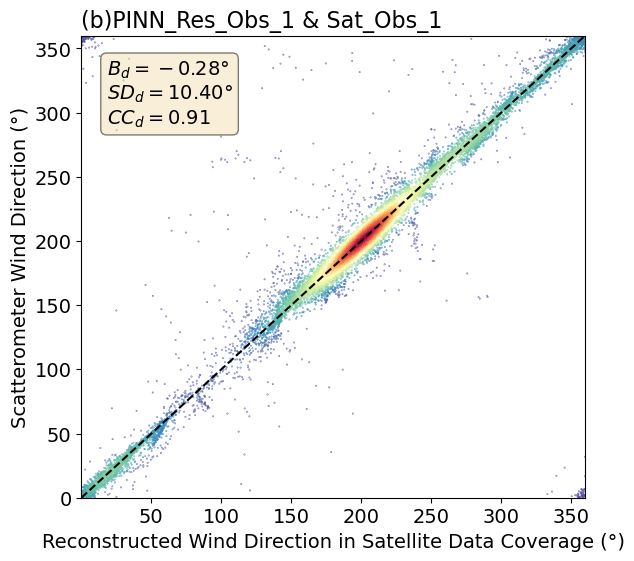

In [26]:
## 绘制风向的散点密度图

# 获取当前时间点的风向数据
wind_dir_pred_t = wind_dir_pred0.flatten()
wind_dir_era5_t = wind_dir_era50.flatten()

# 计算偏差、标准差和相关系数
b_d, SD_d, r_d = calculate_bias_std_correlation(wind_dir_pred_t, wind_dir_era5_t)

# 创建散点密度图
fig, ax = plt.subplots(figsize=(6.5, 6))
k = kde.gaussian_kde([wind_dir_pred_t, wind_dir_era5_t])
xi, yi = np.mgrid[wind_dir_pred_t.min():wind_dir_pred_t.max():100j, 
                  wind_dir_era5_t.min():wind_dir_era5_t.max():100j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

# 绘制散点密度图，设置cmap为'Spectral_r'
scatter = ax.scatter(wind_dir_pred_t, wind_dir_era5_t, marker='o', s=0.1, c=k([wind_dir_pred_t, wind_dir_era5_t]), cmap='Spectral_r')

# # 添加颜色条
# cbar = plt.colorbar(scatter, ax=ax)
# cbar.set_label('Density')

# 设置轴标签和标题
ax.set_xlabel('Reconstructed Wind Direction in Satellite Data Coverage (°)', fontsize=14)
ax.set_ylabel('Scatterometer Wind Direction (°)', fontsize=14)
ax.set_title(f'(b)PINN_Res_Obs_1 & Sat_Obs_1',fontsize = 16,loc='left')

# 添加对角线
ax.plot([wind_dir_pred_t.min(), wind_dir_pred_t.max()], [wind_dir_pred_t.min(), wind_dir_pred_t.max()], 'k--')

# 设置坐标轴范围
ax.set_xlim(wind_dir_pred_t.min(), wind_dir_pred_t.max())
ax.set_ylim(wind_dir_era5_t.min(), wind_dir_era5_t.max())

# 调整坐标轴刻度的字体大小
ax.tick_params(axis='both', which='major', labelsize=14)

# 显示偏差、标准差和相关系数
textstr = '\n'.join((
    r'$B_d=%.2f °$' % (b_d, ),
    r'$SD_d=%.2f °$' % (SD_d, ),
    r'$CC_d=%.2f$' % (r_d, )))

# 放置在图的右上角
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.savefig(f'E:/PINN2/fig6/aPINN_Res_Obs & OBS风向散点密度图.eps',format='eps', bbox_inches='tight')

# plt.savefig(f'D:/PINN/PINN_new/fig6/PINN_Res & CCMP风向散点密度图.png', bbox_inches='tight')
# 显示图像
plt.show()

In [27]:
wind_speed_pred = np.sqrt(non_nan_values_selected_v[1]**2 + non_nan_values_selected_u[1]**2)
wind_speed_era5 = np.sqrt(non_nan_values_combined_data2[1]**2 + non_nan_values_combined_data1[1]**2)

In [28]:
def calculate_statistics(w_pred, w_era5):
    N = len(w_pred)
    b_w = np.mean(w_pred - w_era5)  # 偏差
    SD_w = np.sqrt(np.sum((w_pred - w_era5 - b_w)**2) / (N - 1))  # 标准差
    r_w = np.corrcoef(w_pred, w_era5)[0, 1]  # 相关系数
    return b_w, SD_w, r_w

C:\Users\br_bo\AppData\Local\Temp\ipykernel_32184\854570745.py:10: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  k = kde.gaussian_kde([wind_speed_pred_t, wind_speed_era5_t])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


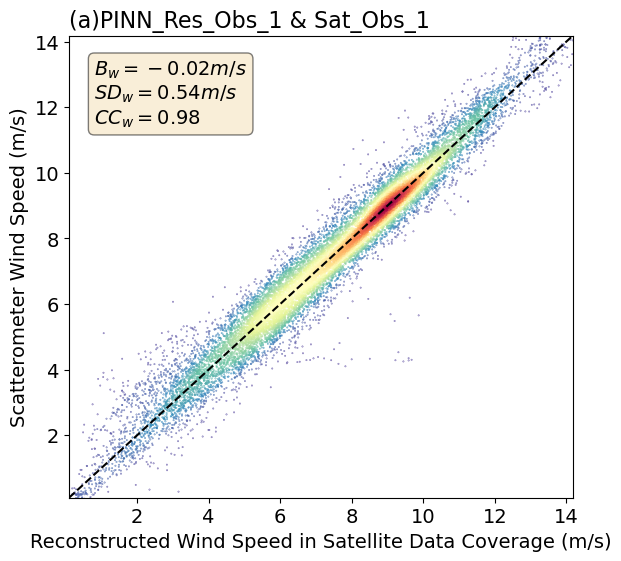

In [29]:
# 获取当前时间点的风速数据
wind_speed_pred_t = wind_speed_pred.flatten()
wind_speed_era5_t = wind_speed_era5.flatten()

# 计算偏差、标准差和相关系数
b_w, SD_w, r_w = calculate_statistics(wind_speed_pred_t, wind_speed_era5_t)

# 创建散点密度图
fig, ax = plt.subplots(figsize=(6.5, 6))
k = kde.gaussian_kde([wind_speed_pred_t, wind_speed_era5_t])
xi, yi = np.mgrid[wind_speed_pred_t.min():wind_speed_pred_t.max():100j, 
                  wind_speed_era5_t.min():wind_speed_era5_t.max():100j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

# 绘制散点密度图，设置cmap为'Spectral_r'
scatter = ax.scatter(wind_speed_pred_t, wind_speed_era5_t,s=0.1, c=k([wind_speed_pred_t, wind_speed_era5_t]), cmap='Spectral_r')

# 添加颜色条
# cbar = plt.colorbar(scatter, ax=ax)
# cbar.set_label('Density')

# 设置轴标签和标题
ax.set_xlabel('Reconstructed Wind Speed in Satellite Data Coverage (m/s)', fontsize=14)
ax.set_ylabel('Scatterometer Wind Speed (m/s)', fontsize=14)
ax.set_title(f'(a)PINN_Res_Obs_1 & Sat_Obs_1',fontsize = 16,loc='left')


# 添加对角线
ax.plot([wind_speed_pred_t.min(), wind_speed_pred_t.max()], [wind_speed_pred_t.min(), wind_speed_pred_t.max()], 'k--')

# 设置坐标轴范围
ax.set_xlim(wind_speed_pred_t.min(), wind_speed_pred_t.max())
ax.set_ylim(wind_speed_pred_t.min(), wind_speed_pred_t.max())

# 显示偏差、标准差和相关系数
textstr = '\n'.join((
    r'$B_w=%.2f m/s$' % (b_w, ),
    r'$SD_w=%.2f m/s$' % (SD_w, ),
    r'$CC_w=%.2f$' % (r_w, )))

# 调整坐标轴刻度的字体大小
ax.tick_params(axis='both', which='major', labelsize=14)

# 放置在图的右上角
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plt.savefig(f'E:/PINN2/fig6/aPINN_Res_Obs & OBS风速散点密度图.eps',format='eps', bbox_inches='tight')
# plt.savefig(f'E:/PINN_final/GRL/3/jPINN_ResND_Obs & OBS风速散点密度图.eps',format='eps', bbox_inches='tight')
# plt.savefig(f'D:/PINN/PINN_new/fig6/PINN_Res & CCMP风速散点密度图.png',bbox_inches='tight')
# 显示图像
plt.show()